# Regresión Lineal

## División entre conjuntos de entrenamiento y evaluación 

Es muy importante tomar en cuenta el problema de **sobre-entrenamiento** del modelo. Si el modelo se ajusta adecuandamente a los datos observados, puede tener mala calidad en la predicción de datos fuera del conjunto de datos utilizados para la estimación. Por tanto, es necesario dividir el conjunto original de los datos en datos de entrenamiento o **training** y datos de evaluación o **testing**. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
mainpath = "/home/oscar/Documentos/udemy/machine-learning-joanby/python-ml-course-master/datasets"
filename = "/ads/Advertising.csv"
fullpath = mainpath + filename

data = pd.read_csv(fullpath)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
a = np.random.randn(len(data))

(array([ 2.,  3., 12., 28., 44., 50., 34., 18.,  6.,  3.]),
 array([-3.17222109, -2.56679671, -1.96137232, -1.35594793, -0.75052354,
        -0.14509915,  0.46032523,  1.06574962,  1.67117401,  2.2765984 ,
         2.88202279]),
 <a list of 10 Patch objects>)

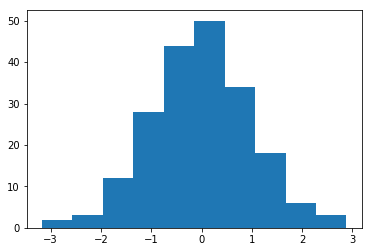

In [27]:
plt.hist(a)

In [28]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [29]:
(len(training), len(testing))

(164, 36)

In [30]:
# crear el modelo
lm = smf.ols(formula = 'Sales ~ TV + Radio', data = training).fit()

In [31]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     712.7
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           1.04e-80
Time:                        01:04:28   Log-Likelihood:                -315.36
No. Observations:                 164   AIC:                             636.7
Df Residuals:                     161   BIC:                             646.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9865      0.320      9.339      0.000       2.355       3.618
TV             0.0450      0.002     28.578      0.000       0.042       0.048
Radio          0.1925      0.009     22.360      0.000       0.175       0.209
==============================================================================
Omnibus:                       59.985   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.672
Skew:                          -1.439   Prob(JB):                     1.07e-41
Kurtosis:                       7.396   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo nos queda como: $\hat{y} = 2.98 + 0.045\cdot TV + 0.19 \cdot Radio$ 

## Validación del modelo con el conjunto de testing

In [32]:
sales_pred = lm.predict(testing) 

In [33]:
sales_pred

4      13.209129
5      12.789311
7      12.172980
12     10.813650
24      8.217707
25     15.502424
26     15.062289
30     21.626591
40     16.399807
44      9.063157
53     20.103020
68     18.972630
70     17.844007
78      8.984070
85     15.230324
88     11.871512
89     17.131666
92     19.239956
101    23.323866
103    14.760643
104    20.317341
115    13.105214
119     6.939613
129     7.980614
135    14.207435
138     9.907953
150    18.305729
153    18.343071
166    11.029015
169    17.832798
171    14.418663
176    19.987746
182     6.615012
183    24.216900
189     6.157518
191     8.465888
dtype: float64

In [34]:
SSD = sum((testing['Sales'] - sales_pred)**2)
SSD

109.90698658147362

In [36]:
RSE = np.sqrt(SSD/(len(testing) - 2 - 1)) # Dos variables en el modelo
RSE

1.8249697928714164

In [1]:
sales_mean = np.mean(testing['Sales'])
error = RSE/sales_mean
error

NameError: name 'np' is not defined

El modelo ajusta bastante bien para los datos de entrenamiento y para los datos de prueba.

### Resumen de las regresiones lineales

|  Nombre  |  Definición          |	R²    | R² Ajust | Est. F    |  p-valor | RSE  | Error |
|----------|----------------------|-------|----------|-----------|----------|------|-------|
| Modelo 1 | Sales ~TV            |	0.612 |	0.610	 |    312.1	 | 1.47e-42 | 3.25 | 23% |
| Modelo 2 | Sales ~ TV-Newspaper |	0.646 |	0.642    |	179.6    | 3.95e-45 | 3.12 | 22% |
| Modelo 3 | Sales ~ TV-Radio     |	0.897 |	0.896    |	859.6    | 4.83e-98 | 1.68 | 11% |
| Modelo 4 | Sales ~ TV+Newspaper+Radio | 0.897 | 0.896 | 570.3 |  1.58e-96 | 1.68 | 12% |
						